<a href="https://colab.research.google.com/github/SubhamZap/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>


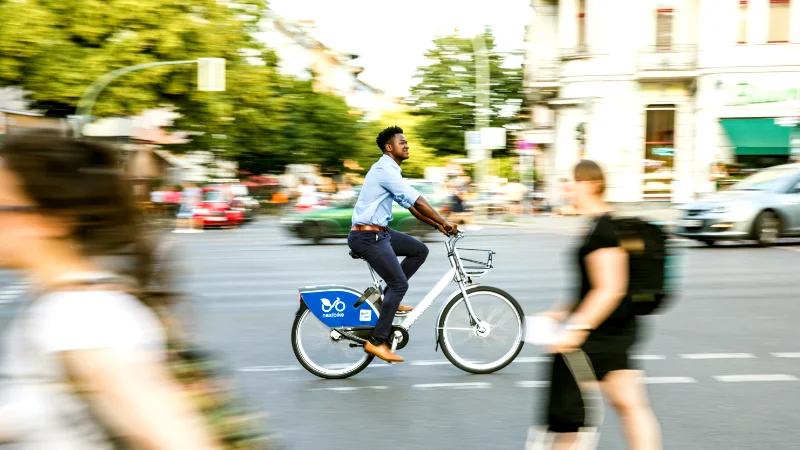

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## Objective of the project

The objective is to predict the hourly number of bikes rented for the stable supply of rented bikes. The rental bike programs are gaining much traction espicially in urban cities, mostly due to environmental issues, traffic and pricing. These programs is also can be associated with fitness awareness program and with more competitive pricing and advertisement more people would shift from cabs to bikes.

# Hypothesis Generation

Before exploring the data and trying to understand the relationship between its variable, it is important to generate a hypothesis regarding the project. It might sound counter-intuitive but it helps in understanding the business problem more clearly, gaining the domain knowledge and avoid any kind of biases after getting into the project.

Here are some of the hypothesis which might affect the demand of bikes:

1. Hourly: The demand for bikes should be more during the office or school timings, i.e. between (7am - 10am) in the morning and (15pm - 19pm) in the evening.

2. Daily: Weekdays should generate more demand than weekends.

3. Seasonal: During rainfall or snowfall, the demand might be low as compared to during summer or fall.


# Table of Contents

1. Data Overview
2. EDA and Data pre-processing
3. Building Regressor models
4. Evaluating Regressor models

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Overview

In [34]:
# Loading the dataset

bike_df = pd.read_csv('/content/drive/MyDrive/Bike Sharing Demand Prediction - Subham Choudhary/SeoulBikeData.csv', encoding = 'unicode escape')
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
# Understanding its numerical features

bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# Exploratory Data Analysis

## Data Cleaning

In [9]:
# Checking for null values

bike_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [35]:
# Copy dataframe so that original dataframe doesn't change

bike_copy_df = bike_df.copy()

In [41]:
# Renaming some columns for easy usage

bike_copy_df.rename(columns = {'Rented Bike Count':'cnt', 'Temperature(°C)':'temp', 'Humidity(%)':'hum', 'Wind speed (m/s)':'windspeed', 
                               'Visibility (10m)':'vis', 'Dew point temperature(°C)':'dptemp', 'Solar Radiation (MJ/m2)':'rad', 'Rainfall(mm)':'rain', 
                               'Snowfall (cm)':'snow'}, inplace = True)

In [38]:
# Drop duplicate rows, if any

bike_copy_df.drop_duplicates(inplace= True)

In [45]:
# Convert all columns to lowercase

bike_copy_df.columns = [x.lower() for x in bike_copy_df.columns]

In [46]:
# New dataframe

bike_copy_df.head()

,date,cnt,hour,temp,hum,windspeed,vis,dptemp,rad,rain,snow,seasons,holiday,functioning day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Data Visualization

Text(0, 0.5, 'Rented Bike Count')

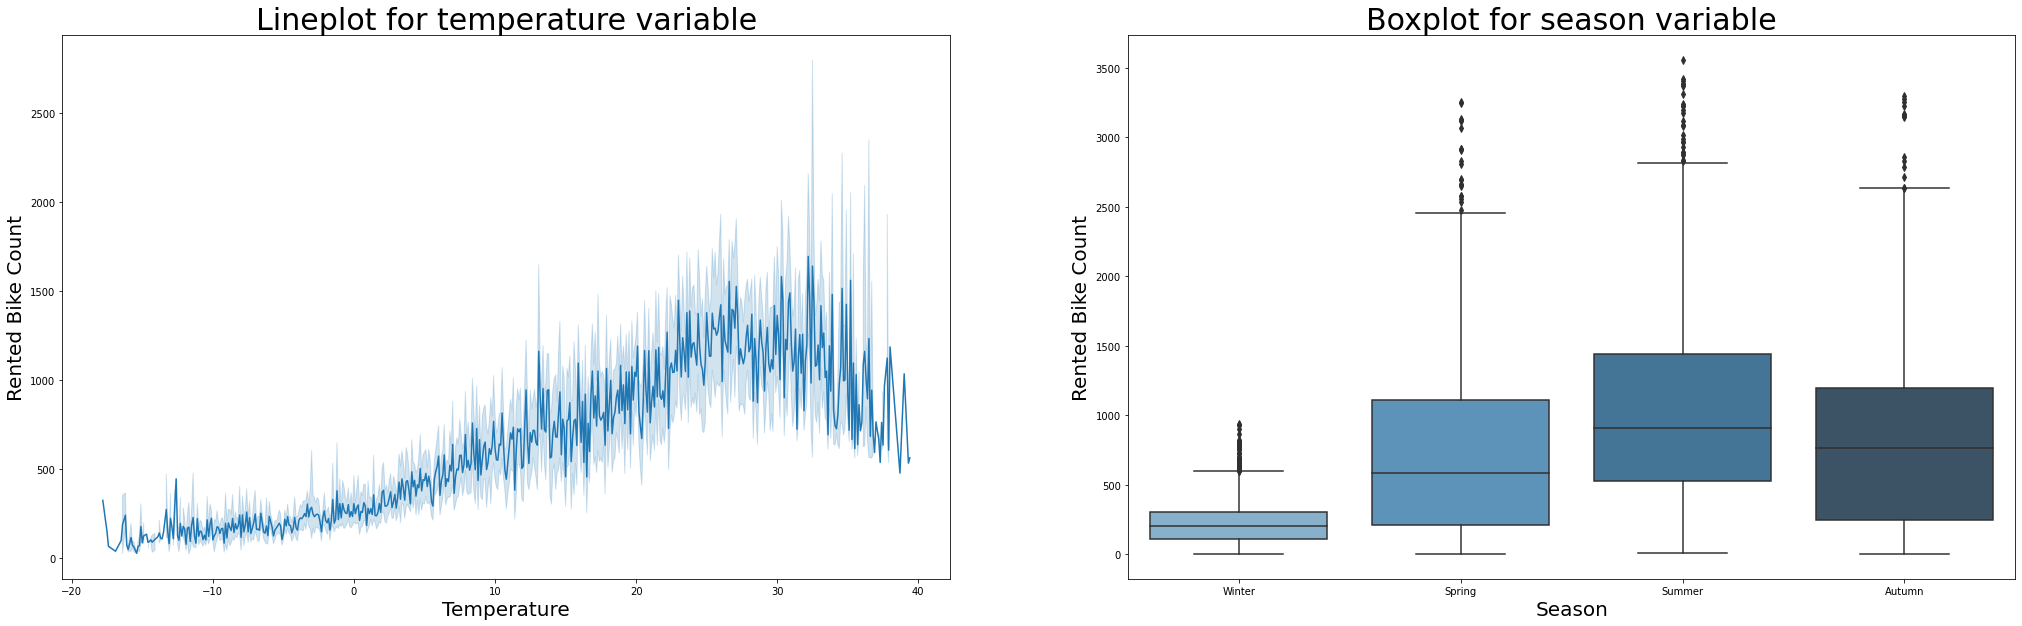

In [57]:
# Number of passangers by temperature and season

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(35, 10))

sns.lineplot(x='temp', y='cnt', data=bike_copy_df, ax=ax1, palette='Blues_d')
ax1.set_title('Lineplot for temperature variable',fontsize = 30)
ax1.set_xlabel('Temperature' , fontsize = 20)
ax1.set_ylabel('Rented Bike Count' , fontsize = 20)

sns.boxplot(x='seasons', y='cnt', data=bike_copy_df, ax=ax2, palette='Blues_d')
ax2.set_title('Boxplot for season variable',fontsize = 30)
ax2.set_xlabel('Season' , fontsize = 20)
ax2.set_ylabel('Rented Bike Count' , fontsize = 20)

Both the plot clearly illustrates that during winter season(when temperature is low) the number of rented bike is very few, but as the temperature increases, the number of rented bikes increases. 